# Homework 6

Copy this notebook. Rename it as: YOURNAME-HW5-streams 

with your name replacing YOURNAME.

Upload your completed jupyter notebook to elearning site as your homework submission. You can put this notebook on your github.

6.1  Register for a stream of Twitter data

6.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

6.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

6.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing

6.1 :Registering for a stream of twitter data.
I have created a application in twitter website and grabbed all the keys required.

In [22]:
%%writefile twitter_streamingSB.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "925146948012822528-BixZTf8fAkM4s5j89b7wT8rDm1FVALs"
access_token_secret = "EjsuYJuhHQK0WnIkxnIrl8qQXCZx6cgHd1yygsejn7njU"
consumer_key = "1PUalMqq9WpgZ5o6bJUtPKJNJ"
consumer_secret = "U1N73shHsc27QFLNRCi0u9KjayMlupMSQc8nCA1ZZEAV5UMqQm"

class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status

#This is a basic listener that just prints received tweets to stdout.
if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'apple', 'google', 'microsoft'
    stream.filter(track=['apple', 'google', 'microsoft'])
    

Overwriting twitter_streamingSB.py


In [ ]:
%%cmd
python twitter_streamingSB.py > twitter_data_final.txt


Cleaning first 2 days Data

In [67]:
import json
import pandas as pd

tweets_data_path = 'twitter_data_pat3.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets['lang'].value_counts()
tweets.head(10)

22399


,text,lang
0,[PR] 2位になったサイトのコンテンツの増やし方教えます\nhttps://t.co/8T...,ja
1,RT @xkingpunk: ok google cmmt avoir des bonnes...,fr
2,"@McKelvie yeah, i feel like google's obsessive...",en
3,RT @M_Hashem1: طالبة تخرج ما وصلها إلا ٨٤ ومطل...,ar
4,RT @simplyMayWard: @StarCreativesTV Nasan na k...,tl
5,RT @celestevisual: El logo de Google no es geo...,es
6,At the very least there is the understanding t...,en
7,RT @algonzalezlu393: International Business Ti...,en
8,sinto raiva de gente que faz pergunta em uma r...,pt
9,RT @shane_barker: A great way to drive #traffi...,en


In [69]:
#tweets.groupby(['lang']=='en')['text']
tweet_text=tweets.loc[tweets['lang'] == 'en', 'text']

print tweet_text.head(10)

2     @McKelvie yeah, i feel like google's obsessive...
6     At the very least there is the understanding t...
7     RT @algonzalezlu393: International Business Ti...
9     RT @shane_barker: A great way to drive #traffi...
11    Apple drops big batch of new beta updates http...
16    RT @ExtCodes: 🔥New Giveaway🔥Glock-18 | Candy...
17    West Pacific Beach: Shuckle ♂ til 11:43:38(28m...
20    RT @babymulla_: How can you choose ice cream d...
21    RT @shane_barker: A great way to drive #traffi...
22    Google Pixel 2 International Giveaway @android...
Name: text, dtype: object


Here I filtered the english tweets.

Elimination of stop words,special characters,urls and retweets.

In [70]:
tweet_text_without_urls = tweet_text.str.replace('http\S+|www.\S', ' ', case=False)
tweet_clean_data=tweet_text_without_urls.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)
#tweet_text_wo_urls_SpecChar=tweet_text_without_urls.str.replace('[^A-Za-z0-9]+','  ',case=False)
#tweet_text_wo_urls_SpecChar_RT=tweet_text_wo_urls_SpecChar.str.replace('RT+.*\:','', case=False)
#(@[A-Za-z0-9]+)+([^0-9A-Za-z \t])+(\w+:\/\/\S+)
print tweet_clean_data.head(5)

#tweet_text_wo_urls_stopwords_RT_SpecChar=tweet_text_wo_urls_stopwords_RT.str.replace('[^A-Za-z0-9]+','', case=False)
tweet_clean_data.str.split(' ', expand=True).stack().unique()
tweet_clean_data.str.split(' ', expand=True).stack().value_counts().head()

2      cKelvie yeah  i feel like google s obsessive ...
6     At the very least there is the understanding t...
7                                                 Bro  
9                                                      
11    Apple drops big batch of new beta updates    A...
Name: text, dtype: object


          104374
s           2091
the         1768
to          1766
Google      1625
dtype: int64

Here,I removed the url links from all the rows by using replace()

I will elminate the stop words from the sub dataframe with the help of nltk package

In [71]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AsusGo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
tweet_clean_data_without_stopwords=tweet_clean_data.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#print tweet_clean_data_without_stopwords
#print tweet_text_without_urls_stopwords
#tweet_clean_data_without_stopwords.split(' ', expand=True).stack().unique()
#tweet_clean_data_without_stopwords.str.split(' ', expand=True).stack().value_counts().head()
new_tweets_clean_data=tweet_clean_data_without_stopwords.str.split(' ', expand=True).stack().unique()
tweet_clean_data_without_stopwords.str.split(' ', expand=True).stack().value_counts()
print new_tweets_clean_data
#result = ' '.join(tweet_text_without_urls_stopwords)
#print result.split()

[u'cKelvie' u'yeah' u'feel' ..., u'christ' u'arresting' u'Disturbing']


I elminated the stop words

In [73]:
import numpy as np
#new_tweets_clean_data.to_csv(r'c:\data\twitter_text_ouput1.txt', header=None, index=None, sep=' ', mode='a')
#np.savetxt('test.out', new_tweets_clean_data, delimiter=' ') 
np.savetxt(r'data/output_11.txt', new_tweets_clean_data, fmt='%s')

Storing the data of ndarray to a txt file using savetxt function

Cleaning 2 days data

In [74]:
import json
import pandas as pd

tweets_data_path = 'twitter_data1.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets['lang'].value_counts()
tweets.head(10)

37980


,text,lang
0,@TVYLORTOMITV @dr_pete @dhavalgshah @ferkungam...,en
1,RT @ACAdams1: https://t.co/aDFLEDpyfo #Cat #pe...,und
2,RT @CollegeDotLife: When you google one questi...,en
3,RT @konceptjackson_: Panama Plus:\n\nhttps://t...,et
4,RT @IGN: ICYMI: #Samsung's new ad is a minute-...,en
5,"@CollinRugg @CGHallenbeck Dude, you got the Ap...",en
6,"The Texas Shooter Was Called A Liberal, Antifa...",en
7,Getting one up on the challenge: Day 6: Wallow...,en
8,"Twitter by Twitter, Inc.\nHi https://t.co/uICu...",en
9,RT @StanM3: Austria- Politician warns: Left wi...,en


In [75]:
tweet_text_final=tweets.loc[tweets['lang'] == 'en', 'text']

print tweet_text_final.head(10)

0     @TVYLORTOMITV @dr_pete @dhavalgshah @ferkungam...
2     RT @CollegeDotLife: When you google one questi...
4     RT @IGN: ICYMI: #Samsung's new ad is a minute-...
5     @CollinRugg @CGHallenbeck Dude, you got the Ap...
6     The Texas Shooter Was Called A Liberal, Antifa...
7     Getting one up on the challenge: Day 6: Wallow...
8     Twitter by Twitter, Inc.\nHi https://t.co/uICu...
9     RT @StanM3: Austria- Politician warns: Left wi...
11    Sableye appeared! (CP:916 IV:91.1%,15/14/12 Fe...
14    RT @StuckOnLex_: Flip $50 to $500 now! Must ha...
Name: text, dtype: object


In [76]:
tweet_text_without_urls_final= tweet_text_final.str.replace('http\S+|www.\S', ' ', case=False)
tweet_clean_data_final=tweet_text_without_urls_final.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)
#tweet_text_wo_urls_SpecChar=tweet_text_without_urls.str.replace('[^A-Za-z0-9]+','  ',case=False)
#tweet_text_wo_urls_SpecChar_RT=tweet_text_wo_urls_SpecChar.str.replace('RT+.*\:','', case=False)
#(@[A-Za-z0-9]+)+([^0-9A-Za-z \t])+(\w+:\/\/\S+)
#print tweet_clean_data_final.head(5)

In [77]:
stop = stopwords.words('english')
tweet_clean_data_without_stopwords_final=tweet_clean_data_final.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
new_tweets_clean_data_final=tweet_clean_data_without_stopwords_final.str.split(' ', expand=True).stack().unique()
#tweet_clean_data_without_stopwords1.str.split(' ', expand=True).stack().value_counts()
print new_tweets_clean_data_final

[u'VYLO' '' u'ollinRugg' ..., u'Catalan' u'PowerOfFreeSpeech'
 u'QuestForFreedom']


In [78]:
np.savetxt(r'data/output_12.txt', new_tweets_clean_data_final, fmt='%s')

After cleaning two streams

6.2 Applying bloom filter on cleaned streams.
I am using dynamic_pybloom

In [89]:
from pybloom import BloomFilter
import os
import re

POST_DIR = 'data1/'
# Read all my posts.
posts = {post_name: open(POST_DIR + post_name).read() for post_name in os.listdir(POST_DIR)}
# Create a dictionary of {"post name": "lowercase word set"}.
split_posts = {name: set(re.split("\W+", contents.lower())) for name, contents in posts.items()}


In [90]:
filters = {}
for name, words in split_posts.items():
    print name, words
    filters[name] = BloomFilter(capacity=len(words), error_rate=0.1)
    for word in words:
        filters[name].add(word)

np.txt set(['', 'woods', 'spiders', 'hanging', 'woody', 'streetviewed', 'exposethemall', 'gab', 'fariko', 'hermann', 'americafirst', 'kaspersky', 'broward', 'proranktracker', 'bringing', 'wooded', 'atiefehren', 'wooden', 'iiangei', 'wednesday', 'crotch', 'tumes', 'pizzle', 'feasibility', 'omegaplatform', 'targo', 'trumpetts', 'snuggled', 'errors', 'starboy', 'yler', 'cooking', 'arikobrainiac', 'designing', 'numeral', 'shocks', 'llabetsi', 'affiliates', 'china', 'mariedugan', 'lsbro', 'gospelrap', 'kids', 'shookus', 'controversy', 'iphoneapp', 'golden', 'ordstream', 'exfatntfs', 'stern', 'dnd', 'dna', 'dnc', 'insecurity', 'musix', 'music', 'therefore', 'dns', 'musik', 'eeap', 'yahoo', 'meteorologist', 'exce', 'friendsgiving', 'veragejenn', 'morally', 'locked', 'peroque', 'locker', 'wana', 'wang', 'hyatt', 'oldschoolgospel', 'want', 'absolute', 'ellamyyoung', 'travel', 'copious', 'playback', 'hannonfnettles', 'cadence', 'reddicoronell', 'wrong', 'calidad', 'bsnl', 'souci', 'podecho', 'en

6.3 For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

In [47]:
%%cmd
pip install dynamic_pybloom

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Downloads\big-data-python-class-master\Homeworks\Homework6>pip install dynamic_pybloom
  Running setup.py bdist_wheel for dynamic-pybloom: started
  Running setup.py bdist_wheel for dynamic-pybloom: finished with status 'done'
  Stored in directory: C:\Users\AsusGo\AppData\Local\pip\Cache\wheels\c1\86\a1\ebfe582d42fb86f612824467cf6bb7de558115f3338b104368
Successfully built dynamic-pybloom

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Downloads\big-data-python-class-master\Homeworks\Homework6>

In [91]:
from dynamic_pybloom import ScalableBloomFilter
sbf = ScalableBloomFilter(mode=ScalableBloomFilter.SMALL_SET_GROWTH)

for tweet_word in new_tweets_clean_data:
    sbf.add(tweet_word)

In [81]:
len(sbf)

15722

In [82]:
match_count = 0
nomatch_count = 0
for new_tweets_clean_data in new_tweets_clean_data_final:
    if tweet in sbf:
        match_count += 1
    else:
        nomatch_count += 1
    
print(match_count)
print(nomatch_count)

0
21378


6.4 Plot a historgram of matches for each twitter in above

[Text(0,0,u'Match'), Text(0,0,u'Unmatch')]

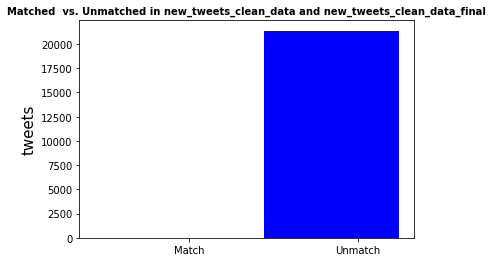

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
x_vars = ['Match', 'Unmatch']
x_pos = list(range(len(x_vars)))
y_pos = [match_count,nomatch_count]
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, y_pos, width, alpha=1, color='b')

# Setting axis labels and ticks
ax.set_ylabel('tweets', fontsize=15)
ax.set_title('Matched  vs. Unmatched in new_tweets_clean_data and new_tweets_clean_data_final', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(x_vars)
#plt.grid()

No tweets got matched while comparing both cleaned streams of data

References:

http://localhost:8890/notebooks/Downloads/big-data-python-class-master/Lectures/Lecture6-Streams/Streams%20Tutorial.ipynb
https://stackoverflow.com/questions/45395676/remove-a-url-row-by-row-from-a-large-set-of-text-in-python-panda-dataframe
https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string
https://stackoverflow.com/questions/32425334/splitting-a-string-in-a-python-dataframe
https://stackoverflow.com/questions/26594817/remove-and-rt-from-the-tweet
https://stackoverflow.com/questions/38557617/how-to-get-all-the-unique-words-in-the-data-frame
https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
http://localhost:8888/notebooks/Downloads/big-data-python-class-master/Lectures/Lecture6-Streams/Bloom%20Filter%20Example.ipynb
https://github.com/srf5132/dynamic-pybloom
https://github.com/jaybaird/python-bloomfilter